# Predicting Cancer Cell Line Sensitivity to Palbociclib using Gene Expression Profiles

## 1. Project Overview
This project aims to predict the **LN_IC50** response of cancer cell lines to the drug **Palbociclib**, a CDK4/6 inhibitor, using **gene expression profiles**. The objective is not only to build a predictive model, but also to identify key genes associated with sensitivity or resistance to this drug. This serves as a foundational study in the realm of **precision medicine**.

In [2]:
import pandas as pd
import os

## 2. Data Sources
The following datasets were used:

- `Cell_line_RMA_proc_basalExp.txt`: Baseline gene expression levels across cell lines.
- `GDSC2_fitted_dose_response_27Oct23.xlsx`: Dose-response curves including IC50 for various drugs and cell lines.
- `Cell_Lines_Details.xlsx`: Metadata for cell lines (not used yet).
- `mutations_all_20250318.csv`: Binary mutation data (not used yet).

In [66]:
expression_path = "Cell_line_RMA_proc_basalExp.txt"
mutation_path = "mutations_all_20250318.csv"
expression_extract_path = "GDSC2_fitted_dose_response_27Oct23.xlsx"
mutation_extract_path = "Cell_Lines_Details.xlsx"

In [95]:
expression_df = pd.read_csv("Cell_line_RMA_proc_basalExp.txt", sep="\t", index_col=0)
expression_df = expression_df[expression_df.index.notna()]

print("Shape:", expression_df.shape)
expression_df.head()

Shape: (17419, 1019)


,GENE_title,DATA.906826,DATA.687983,DATA.910927,DATA.1240138,DATA.1240139,DATA.906792,DATA.910688,DATA.1240135,DATA.1290812,...,DATA.753584,DATA.907044,DATA.998184,DATA.908145,DATA.1659787,DATA.1298157,DATA.1480372,DATA.1298533,DATA.930299,DATA.905954.1
GENE_SYMBOLS,,,,,,,,,,,,,,,,,,,,,
TSPAN6,tetraspanin 6 [Source:HGNC Symbol;Acc:11858],7.632023,7.548671,8.712338,7.797142,7.729268,7.074533,3.285198,6.961606,5.943046,...,7.105637,3.236503,3.038892,8.373223,6.932178,8.441628,8.422922,8.089255,3.112333,7.153127
TNMD,tenomodulin [Source:HGNC Symbol;Acc:17757],2.964585,2.777716,2.643508,2.817923,2.957739,2.889677,2.828203,2.874751,2.686874,...,2.798847,2.745137,2.976406,2.852552,2.622630,2.639276,2.879890,2.521169,2.870468,2.834285
DPM1,dolichyl-phosphate mannosyltransferase polypep...,10.379553,11.807341,9.880733,9.883471,10.418840,9.773987,10.264385,10.205931,10.299757,...,10.486486,10.442951,10.311962,10.454830,10.418475,11.463742,10.557777,10.792750,9.873902,10.788218
SCYL3,SCY1-like 3 (S. cerevisiae) [Source:HGNC Symbo...,3.614794,4.066887,3.956230,4.063701,4.341500,4.270903,5.968168,3.715033,3.848112,...,3.696835,4.624013,4.348524,3.858121,3.947561,4.425849,3.550390,4.443337,4.266828,4.100493
C1orf112,chromosome 1 open reading frame 112 [Source:HG...,3.380681,3.732485,3.236620,3.558414,3.840373,3.815055,3.011867,3.268449,3.352835,...,3.726833,3.947744,3.806584,3.196988,3.814831,4.384732,4.247189,3.071359,3.230197,3.435795


In [96]:
drug_response_df = pd.read_excel("GDSC2_fitted_dose_response_27Oct23.xlsx")

print("Shape:", drug_response_df.shape)
drug_response_df.head()

Shape: (242036, 19)


,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC2,343,15946310,683667,PFSK-1,SIDM01132,MB,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-1.463887,0.930220,0.089052,0.433123
1,GDSC2,343,15946548,684052,A673,SIDM00848,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-4.869455,0.614970,0.111351,-1.421100
2,GDSC2,343,15946830,684057,ES5,SIDM00263,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.360586,0.791072,0.142855,-0.599569
3,GDSC2,343,15947087,684059,ES7,SIDM00269,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-5.044940,0.592660,0.135539,-1.516647
4,GDSC2,343,15947369,684062,EW-11,SIDM00203,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.741991,0.734047,0.128059,-0.807232


In [97]:
top_drugs = drug_response_df.groupby("DRUG_NAME")["CELL_LINE_NAME"].nunique().sort_values(ascending=False)

top_drugs.head(10)

DRUG_NAME
MG-132            969
Staurosporine     968
Docetaxel         968
5-Fluorouracil    968
MK-2206           968
Camptothecin      968
PD0325901         968
Nutlin-3a (-)     968
Palbociclib       968
Selumetinib       967
Name: CELL_LINE_NAME, dtype: int64

In [98]:
palbo_df = drug_response_df[drug_response_df["DRUG_NAME"] == "Palbociclib"]

print("Unique cell lines:", palbo_df["CELL_LINE_NAME"].nunique())

Unique cell lines: 968


In [99]:
palbo_cell_ids = palbo_df["COSMIC_ID"].astype(str).unique()

expression_cell_ids = [col.split('.')[-1] for col in expression_df.columns]
expression_df.columns = expression_cell_ids

common_ids = list(set(expression_df.columns).intersection(palbo_cell_ids))
print("Matched cell lines:", len(common_ids))

Matched cell lines: 940


## 3. Methodology

### 3.1 Data Preparation
- Gene expression file was transposed and gene names were cleaned.
- Extracted expression data only for those cell lines which had Palbociclib response data.
- Matched **COSMIC_IDs** from expression and drug response datasets.

### 3.2 Target Variable
- The natural log of IC50 values (`LN_IC50`) for Palbociclib was used as the response variable.

In [100]:
X = expression_df[common_ids].T
y = palbo_df[palbo_df["COSMIC_ID"].astype(str).isin(common_ids)][["COSMIC_ID", "LN_IC50"]].drop_duplicates()

y_df["COSMIC_ID"] = y_df["COSMIC_ID"].astype(str)
X["COSMIC_ID"] = X.index
merged = pd.merge(X, y_df, on="COSMIC_ID")
y = merged["LN_IC50"]
X = merged.drop(columns=["COSMIC_ID", "LN_IC50"])

In [101]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Any missing in X?", X.isnull().values.any())
print("Any missing in y?", y.isnull().values.any())
print("y summary:")
print(y.describe())

X shape: (940, 17419)
y shape: (940,)
Any missing in X? False
Any missing in y? False
y summary:
count    940.000000
mean       3.448999
std        1.567698
min       -2.212706
25%        2.455535
50%        3.605617
75%        4.540161
max        8.871291
Name: LN_IC50, dtype: float64


In [102]:
X.isnull().sum().sum()

np.int64(0)

## 4. Modeling Approach

### 4.1 Ridge Regression (L2 Regularization)
- First model trained on all available genes.
- **RMSE**: ~1.18  
- **R² Score**: ~0.47

### 4.2 Feature Importance
- Top genes were extracted based on absolute Ridge coefficients.
- Top 100 genes were then used to retrain models.

### 4.3 Refined Models on Top 100 Genes
- **Ridge Regression (tuned)**:
  - Hyperparameter tuning using `RidgeCV`
  - **Best Alpha**: 10,000
  - **RMSE**: ~1.17
  - **R² Score**: ~0.48

- **Random Forest**:
  - RMSE: ~1.26
  - R² Score: ~0.40

- **XGBoost**:
  - RMSE: ~1.30
  - R² Score: ~0.36

> Ridge was the best performing model in terms of both accuracy and interpretability.

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [104]:
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=1)
X.columns = X.columns.astype(str)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
model = Ridge(alpha=1.0)
model.fit(X_train_scaled, y_train)

Ridge()

In [108]:
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 1.1845128390141229
R² Score: 0.4706159167762066


In [109]:
coef = model.coef_
gene_names = X.columns
importance_df = pd.DataFrame({"Gene": gene_names, "Weight": coef})
importance_df["AbsWeight"] = importance_df["Weight"].abs()
top_genes = importance_df.sort_values("AbsWeight", ascending=False).head(20)
top_genes

,Gene,Weight,AbsWeight
16456,CXorf30,0.011489,0.011489
8884,ENKUR,0.011344,0.011344
12839,FAM53A,0.010924,0.010924
4243,DNAH6,0.010670,0.010670
5656,OR7C1,0.010648,0.010648
16415,PNMAL2,0.010630,0.010630
17316,SDR16C6P,-0.010455,0.010455
6638,ACRV1,-0.010423,0.010423
7686,LRRC46,0.010393,0.010393
10454,GLB1L,-0.010270,0.010270


In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R² Score:", r2_rf)

Random Forest RMSE: 1.2562330302979368
Random Forest R² Score: 0.4045685759763753


In [34]:
from xgboost import XGBRegressor

In [113]:
top_genes = importance_df.sort_values("AbsWeight", ascending=False).head(100)["Gene"]
X_top = X[top_genes]

X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=-1, num_parallel_tree=None, ...)

In [114]:
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost RMSE:", rmse_xgb)
print("XGBoost R² Score:", r2_xgb)

XGBoost RMSE: 1.2990682860292055
XGBoost R² Score: 0.3632700246933792


In [115]:
from sklearn.linear_model import RidgeCV

In [116]:
alphas = np.logspace(-4, 4, 50)
ridge_cv = RidgeCV(alphas=alphas, scoring='r2', cv=5)
ridge_cv.fit(X_train_scaled, y_train)

best_alpha = ridge_cv.alpha_
print("Best alpha:", best_alpha)

Best alpha: 10000.0


In [117]:
y_pred = ridge_cv.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Tuned Ridge RMSE:", rmse)
print("Tuned Ridge R² Score:", r2)

Tuned Ridge RMSE: 1.1724177729065908
Tuned Ridge R² Score: 0.4813718074192722


In [118]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

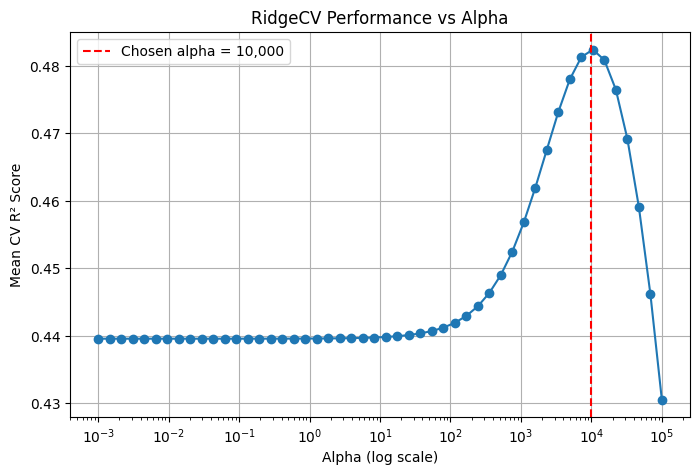

In [119]:
alphas = np.logspace(-3, 5, 50)
mean_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, X_train_scaled, y_train, scoring='r2', cv=5)
    mean_scores.append(scores.mean())

plt.figure(figsize=(8, 5))
plt.semilogx(alphas, mean_scores, marker='o')
plt.axvline(10000, color='red', linestyle='--', label='Chosen alpha = 10,000')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Mean CV R² Score")
plt.title("RidgeCV Performance vs Alpha")
plt.legend()
plt.grid(True)
plt.show()

## 5. Residual Diagnostics (Ridge Model)

### 5.1 Histogram & Q-Q Plot
- Residuals showed approximate normality.
- Q-Q plot confirmed alignment with the normal distribution.

### 5.2 Homoscedasticity
- Residuals vs predicted values showed random scatter, suggesting variance stability.

### 5.3 Autocorrelation
- **Durbin-Watson statistic**: ~1.75 (close to 2, low autocorrelation)

### 5.4 Normality Test
- **Shapiro-Wilk test**:
  - Statistic: 0.995
  - p-value: 0.80 (fails to reject normality)

In [122]:
residuals = y_test - y_pred

In [123]:
import seaborn as sns
import scipy.stats as stats

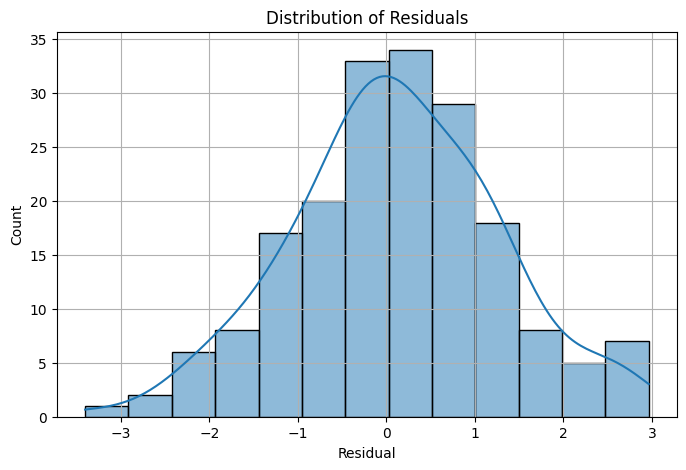

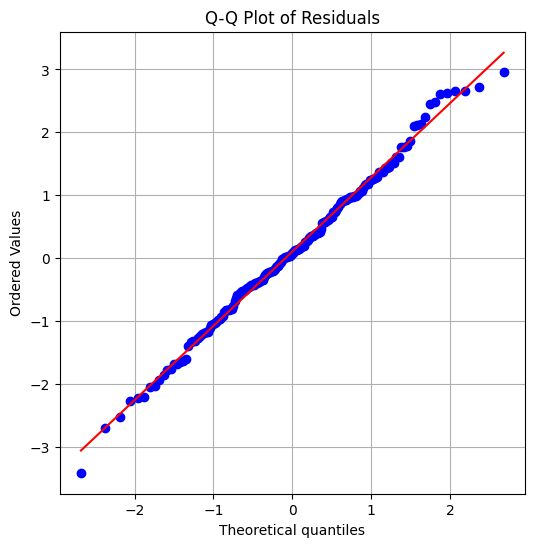

In [124]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()

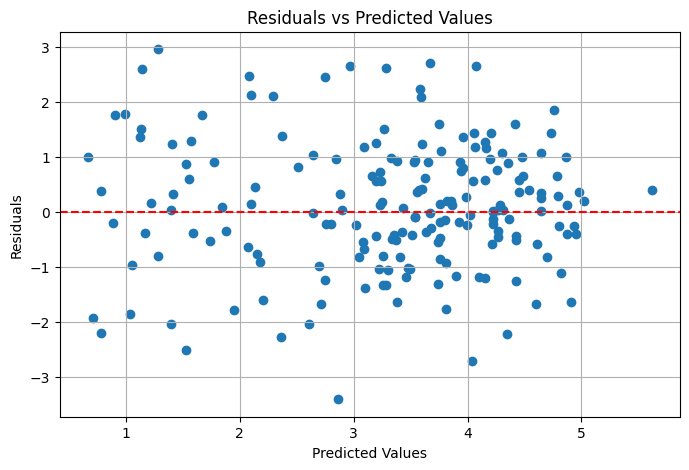

In [125]:
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.show()

In [126]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_stat)

Durbin-Watson statistic: 1.7556882932353635


In [127]:
from scipy.stats import shapiro

shapiro_stat, p_val = shapiro(residuals)
print(f"Shapiro-Wilk test: stat={shapiro_stat:.4f}, p-value={p_val:.4f}")

Shapiro-Wilk test: stat=0.9951, p-value=0.8006


## 6. Biological Interpretation (Next Steps)

- Use databases like **GeneCards**, **Enrichr**, or **NCBI** to look up the biological role of top genes.
- Run **Gene Set Enrichment Analysis (GSEA)** on the top 50/100 genes.
- Identify if any genes are known to be involved in:
  - **Cell cycle regulation**
  - **CDK4/6 pathways**
  - **Cancer drug resistance/sensitivity**


## 9. Conclusion
This project demonstrates a complete predictive pipeline for drug response using gene expression data, with interpretable Ridge regression models. Residual diagnostics confirm that the assumptions of linear modeling are reasonably met. The model also surfaces biologically relevant genes, which can inform follow-up wet lab experiments or therapeutic research.

> "From expression matrix to precision therapy — one regression at a time."